<img src="logo.png">

In [3]:
## Llamado de bibliotecas

import pandas as pd
import numpy as np
from siuba import *
from siuba.dply.vector import *
from plotnine import *

gapminder = pd.read_csv("gapminder.csv")

In [8]:
gapminder

,country,continent,year,lifeExp,population,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [12]:
gapminder >> head(100)

,country,continent,year,lifeExp,population,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
95,Bahrain,Asia,2007,75.635,708573,29796.048340
96,Bangladesh,Asia,1952,37.484,46886859,684.244172
97,Bangladesh,Asia,1957,39.348,51365468,661.637458
98,Bangladesh,Asia,1962,41.216,56839289,686.341554


Genera una tabla donde se muestra la mayor y menor esperanza de vida en Asia durante cada año, incluyendo el país donde se encuentra dicha medida

In [15]:
### Filtra para mostrar únicamente la información de Asia
gapminder >> filter(_.continent == "Asia")

,country,continent,year,lifeExp,population,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827


In [18]:
### Vamos a ver los años presentes
gapminder >> filter(_.continent == "Asia") >> select(_.year)

,year
0,1952
1,1957
2,1962
3,1967
4,1972
...,...
1675,1987
1676,1992
1677,1997
1678,2002


In [19]:
### Vamos a ver los años presentes
gapminder >> filter(_.continent == "Asia") >> select(_.year) >> distinct()

,year
0,1952
1,1957
2,1962
3,1967
4,1972
5,1977
6,1982
7,1987
8,1992
9,1997


In [21]:
## Resolvamos nuestro problema

gapminder >> filter(_.continent == "Asia") >> select(_.country,_.year,_.lifeExp)

,country,year,lifeExp
0,Afghanistan,1952,28.801
1,Afghanistan,1957,30.332
2,Afghanistan,1962,31.997
3,Afghanistan,1967,34.020
4,Afghanistan,1972,36.088
...,...,...,...
1675,"Yemen, Rep.",1987,52.922
1676,"Yemen, Rep.",1992,55.599
1677,"Yemen, Rep.",1997,58.020
1678,"Yemen, Rep.",2002,60.308


In [32]:
### Agrupar

mis_resultados = (
gapminder >> 
    filter(_.continent == "Asia") >> 
    select(_.country,_.year,_.lifeExp) >> 
    group_by(_.year) >>
    filter((_.lifeExp == _.lifeExp.min()) | (_.lifeExp == _.lifeExp.max())) >>
    arrange(_.year) >>
    mutate(tipo=["Mínimo","Máximo"]) >>
    ungroup()
)


In [33]:
mis_resultados

,country,year,lifeExp,tipo
0,Afghanistan,1952,28.801,Mínimo
756,Israel,1952,65.390,Máximo
1,Afghanistan,1957,30.332,Mínimo
757,Israel,1957,67.840,Máximo
2,Afghanistan,1962,31.997,Mínimo
758,Israel,1962,69.390,Máximo
3,Afghanistan,1967,34.020,Mínimo
795,Japan,1967,71.430,Máximo
4,Afghanistan,1972,36.088,Mínimo
796,Japan,1972,73.420,Máximo


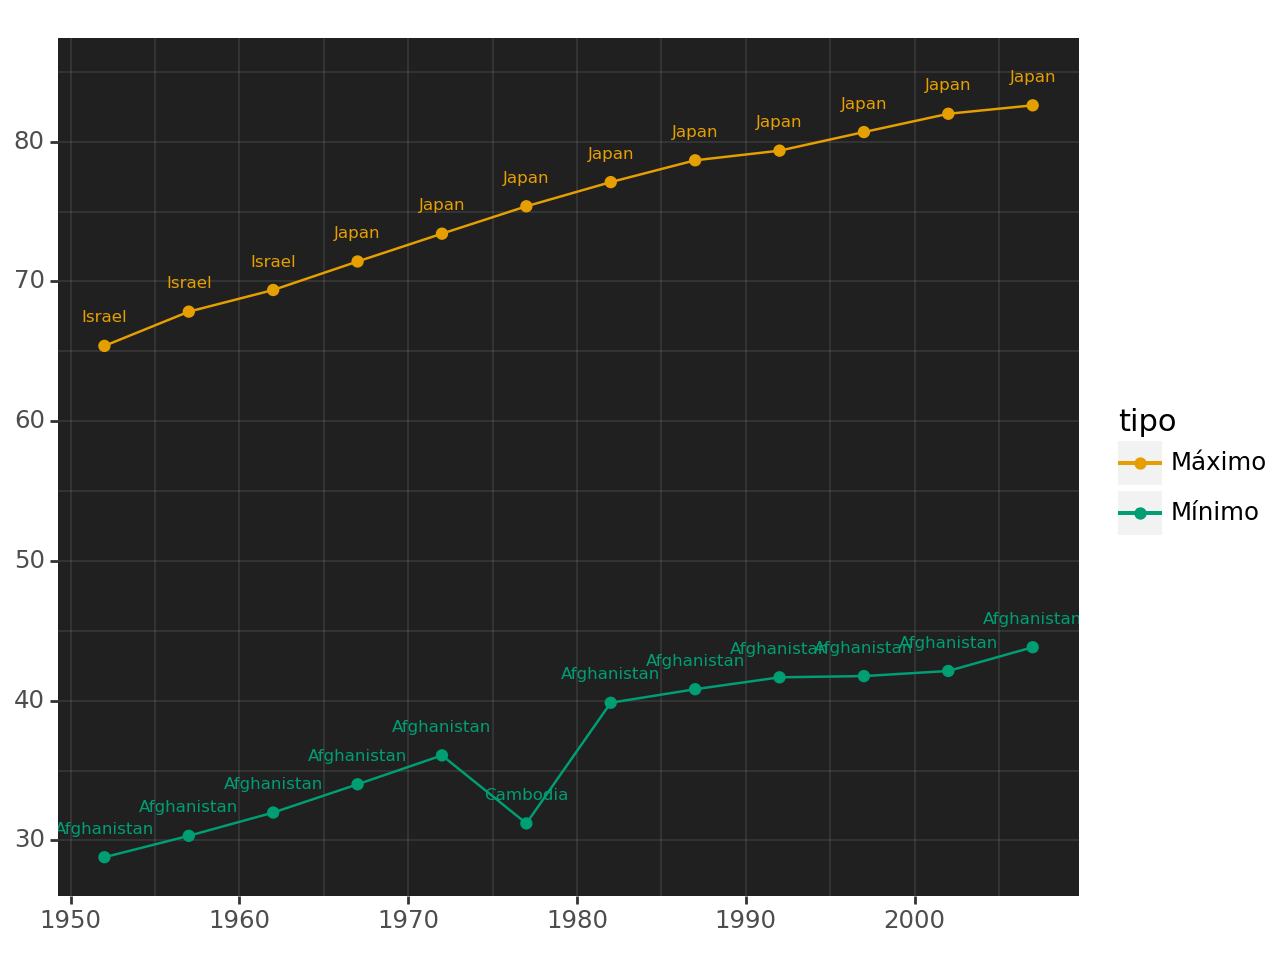

<Figure Size: (640 x 480)>

In [43]:
# Grafiquemos los datos

(
ggplot() +
    geom_point(data = mis_resultados,
              mapping = aes(x="year",y="lifeExp",color="tipo")) +
    geom_line(data = mis_resultados,
              mapping = aes(x="year",y="lifeExp",color="tipo")) +
    geom_text(data = mis_resultados,
              mapping = aes(x="year",y="lifeExp + 2",label="country",color="tipo"),size=6) +
    scale_color_manual(values = ["#E69F00","#009E73"]) +
    theme(panel_background = element_rect("#202020"),
         panel_grid = element_line(color = "darkgrey",size=0.1),
         axis_title = element_blank())
    
)


In [50]:
comportamiento_promedio = (gapminder >> 
    filter(_.continent == "Asia") >> 
    group_by(_.year) >>
    summarize(promedio = _.lifeExp.mean())
                          )
comportamiento_promedio

,year,promedio
0,1952,46.314394
1,1957,49.318544
2,1962,51.563223
3,1967,54.663640
4,1972,57.319269
5,1977,59.610556
6,1982,62.617939
7,1987,64.851182
8,1992,66.537212
9,1997,68.020515


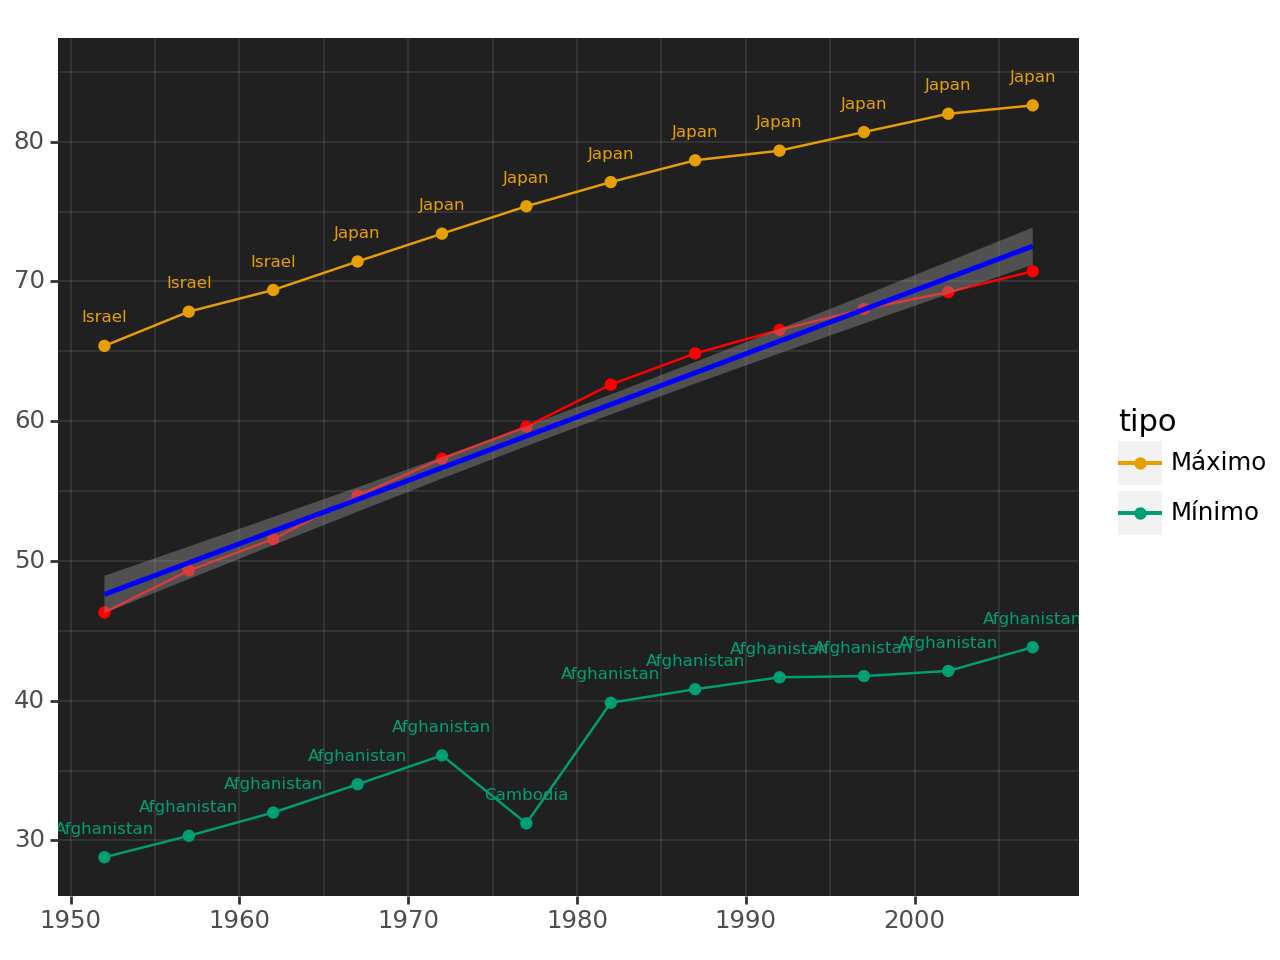

<Figure Size: (640 x 480)>

In [54]:
(
ggplot() +
    geom_point(data = mis_resultados,
              mapping = aes(x="year",y="lifeExp",color="tipo")) +
    geom_line(data = mis_resultados,
              mapping = aes(x="year",y="lifeExp",color="tipo")) +
    geom_text(data = mis_resultados,
              mapping = aes(x="year",y="lifeExp + 2",label="country",color="tipo"),size=6) +
    geom_point(data = comportamiento_promedio,
              mapping = aes(x="year",y="promedio"),color = "red") +
    geom_line(data = comportamiento_promedio,
              mapping = aes(x="year",y="promedio"),color="red") +
    geom_smooth(data = comportamiento_promedio, method = "lm",
              mapping = aes(x="year",y="promedio"),color="blue") +
    scale_color_manual(values = ["#E69F00","#009E73"]) +
    theme(panel_background = element_rect("#202020"),
         panel_grid = element_line(color = "darkgrey",size=0.1),
         axis_title = element_blank())
    
)